In [11]:
import numpy as np

# 3-1-1. checkpoint 1)Define constants in atomic units
hbar = 1  # Reduced Planck constant (atomic units)
m = 1     # Mass of the particle (atomic units)

In [12]:
# 3-1-1. checkpoint 3)Define the length of the box and the number of points for the grid
L = 40  # Length in atomic units
N = 2000  # Number of grid points

# Discretize the space from -L/2 to L/2 with N points
x = np.linspace(-L/2, L/2, N)

# Calculate the step size dx
dx = x[1] - x[0]

# Print the results
print(f"Number of grid points: {N}")
print(f"x range: [{x[0]}, {x[-1]}] with step size dx = {dx:.5f} a.u.")

Number of grid points: 2000
x range: [-20.0, 20.0] with step size dx = 0.02001 a.u.


In [13]:
# 3-1-2. checkpoint 1)Write a Python function to construct the potential matrix for the harmonic potential
def harmonic_potential(x, omega=1): # define omega as 1 a.u.
    """
    Compute the square well potential with given equation
    
    parameters
    :x : distance
    :omega : given omega value in the system
    """
    return 0.5 * m * omega**2 * x**2

# 3-1-1. checkpoint 2)Define the anharmonic (Morse) potential function, define D ans 10 a.u.
# 3-1-2. checkpoint 1)Write a Python function to construct the potential matrix for the anharmonic potential
def morse_potential(x, D=10, beta=0.22361, x0=0): 
    """
    Compute the square well potential with given equation
    
    parameters
    :x : distance
    :D : depth of the potential well
    :omega : given omega value in the system
    """
    return D * (1 - np.exp(-beta * (x - x0)))**2

# Function to construct the potential matrix using np.eye
def construct_potential_matrix(potential_func, x):
    V = np.eye(len(x))  # Create an identity matrix with the same size as x
    for i in range(len(x)):
        V[i, i] = potential_func(x[i])  # Set the diagonal elements to the potential value
    return V

# Construct the potential matrices for both potentials
V_harmonic = construct_potential_matrix(harmonic_potential, x)
V_morse = construct_potential_matrix(morse_potential, x)

# Print the potential matrices
print("Harmonic Potential Matrix:")
print(V_harmonic)
print(f"Harmonic Potential Matrix shape: {V_harmonic.shape}")

print("\nMorse Potential Matrix:")
print(V_morse)
print(f"Morse Potential Matrix shape: {V_morse.shape}")

Harmonic Potential Matrix:
[[200.          0.          0.        ...   0.          0.
    0.       ]
 [  0.        199.6000001   0.        ...   0.          0.
    0.       ]
 [  0.          0.        199.2004006 ...   0.          0.
    0.       ]
 ...
 [  0.          0.          0.        ... 199.2004006   0.
    0.       ]
 [  0.          0.          0.        ...   0.        199.6000001
    0.       ]
 [  0.          0.          0.        ...   0.          0.
  200.       ]]
Harmonic Potential Matrix shape: (2000, 2000)

Morse Potential Matrix:
[[7.49075006e+04 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.42324601e+04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 7.35634682e+04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.77083155e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+

In [14]:
# Construct the Laplacian matrix using the finite difference approximation

def construct_laplacian(N, dx):
    """
    Construct the Laplacian matrix using finite difference method.
    
    parameters
    : N: Number of points in the discretized grid.
    : dx: Spacing between adjacent points on the grid.
    :return: Laplacian matrix of size N x N.
    """
    # Coefficient for the Laplacian matrix
    coefficient = 1 / (dx ** 2)
    
    # Main diagonal with -2
    main_diag = -2 * np.ones(N)
    
    # Off-diagonal with 1
    off_diag = np.ones(N - 1)
    
    # 3-b-Checking point 2) Write a Python function that constructs this Laplacian matrix using NumPy.
    laplacian = coefficient * (np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1))
    
    return laplacian

# Construct the Laplacian matrix for N=2000 grid points
laplacian = construct_laplacian(N, dx)

# Print the shape of the Laplacian matrix and a small section to verify
print("Laplacian matrix:")
print(laplacian)  # Print the rows and columns for verification
print(f"Laplacian matrix shape: {laplacian.shape}") # Print the number of rows and columns for verification


Laplacian matrix:
[[-4995.00125   2497.500625     0.       ...     0.           0.
      0.      ]
 [ 2497.500625 -4995.00125   2497.500625 ...     0.           0.
      0.      ]
 [    0.        2497.500625 -4995.00125  ...     0.           0.
      0.      ]
 ...
 [    0.           0.           0.       ... -4995.00125   2497.500625
      0.      ]
 [    0.           0.           0.       ...  2497.500625 -4995.00125
   2497.500625]
 [    0.           0.           0.       ...     0.        2497.500625
  -4995.00125 ]]
Laplacian matrix shape: (2000, 2000)


In [15]:
# 3-1-3. checkpoint 1 and 2) Construct the total Hamiltonian for the system
def construct_hamiltonian(laplacian, potential_matrix, hbar=1, m=1):
    # Construct the Hamiltonian as H = -(hbar^2 / 2m) * Laplacian + V(x)
    Hamiltonian = -0.5 * laplacian + potential_matrix
    return Hamiltonian

# 3-1-4. checkpoint 2) Store the eigenfunctions for both potentials
Hamiltonian_harmonic = construct_hamiltonian(laplacian, V_harmonic)
Hamiltonian_morse = construct_hamiltonian(laplacian, V_morse)

# Print the shape of the Hamiltonian matrix and a small section to verify
print(f"Hamiltonian (Harmonic) matrix shape: {Hamiltonian_harmonic.shape}") # Print the number of rows and columns for verification
print("Hamiltonian (Harmonic) matrix:")
print(Hamiltonian_harmonic)  # Rows and columns for verification

print(f"\nHamiltonian (Morse) matrix shape: {Hamiltonian_morse.shape}") # Print the number of rows and columns for verification
print("Hamiltonian (Morse) matrix:")
print(Hamiltonian_morse)  # Rows and columns for verification

Hamiltonian (Harmonic) matrix shape: (2000, 2000)
Hamiltonian (Harmonic) matrix:
[[ 2697.500625  -1248.7503125     0.        ...     0.
      0.            0.       ]
 [-1248.7503125  2697.1006251 -1248.7503125 ...     0.
      0.            0.       ]
 [    0.        -1248.7503125  2696.7010256 ...     0.
      0.            0.       ]
 ...
 [    0.            0.            0.        ...  2696.7010256
  -1248.7503125     0.       ]
 [    0.            0.            0.        ... -1248.7503125
   2697.1006251 -1248.7503125]
 [    0.            0.            0.        ...     0.
  -1248.7503125  2697.500625 ]]

Hamiltonian (Morse) matrix shape: (2000, 2000)
Hamiltonian (Morse) matrix:
[[77405.00124916 -1248.7503125      0.         ...     0.
      0.             0.        ]
 [-1248.7503125  76729.96071884 -1248.7503125  ...     0.
      0.             0.        ]
 [    0.         -1248.7503125  76060.96883595 ...     0.
      0.             0.        ]
 ...
 [    0.             0.      

In [16]:
def solve_eigenvalues_and_eigenfunctions(hamiltonian):
    """
    Solve for the eigenvalues and eigenfunctions of the Hamiltonian matrix.
    
    parameter
    : hamiltonian: The Hamiltonian matrix.
    : return: Sorted eigenvalues and corresponding eigenfunctions.
    """
    # 3-1-4. checkpoint 1) Use NumPy’s linear algebra package (np.linalg.eig) to compute the eigenvalues (energy levels)and eigenfunctions of the Hamiltonian for the harmonic and anharmonic potentials
    eigenvalues, eigenfunctions = np.linalg.eig(hamiltonian)

    # 3-1-4. checkpoint 2) Store the eigenfunctions for both potentials
    Hamiltonian_harmonic = construct_hamiltonian(laplacian, V_harmonic)
    Hamiltonian_morse = construct_hamiltonian(laplacian, V_morse)
    
    # 3-1-4. Checking point 3) Sort the eigenvalues and corresponding eigenfunctions in increasing order
    sorted_indices = np.argsort(eigenvalues)
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenfunctions = eigenfunctions[:, sorted_indices]
    
    # 3-1-4. Checking point 3) Extract the first ten energy levels
    first_ten_energies = sorted_eigenvalues[:10]
    
    return first_ten_energies, sorted_eigenfunctions

# Solve for eigenvalues and eigenfunctions
first_ten_energies_harmonic, eigenfunctions_harmonic = solve_eigenvalues_and_eigenfunctions(Hamiltonian_harmonic)

# Print the first ten energy levels
print("First ten energy levels of the Hamiltonian for the harmonic (in atomic units):")
for i, energy in enumerate(first_ten_energies_harmonic, start=1):
    print(f"Energy level {i}: {energy:.2f} a.u.")

# Solve for eigenvalues and eigenfunctions
first_ten_energies_morse, eigenfunctions_morse = solve_eigenvalues_and_eigenfunctions(Hamiltonian_morse)

print("\nFirst ten energy levels of the Hamiltonian for the anharmonic (in atomic units):")
for i, energy in enumerate(first_ten_energies_morse, start=1):
    print(f"Energy level {i}: {energy:.2f} a.u.")

First ten energy levels of the Hamiltonian for the harmonic (in atomic units):
Energy level 1: 0.50 a.u.
Energy level 2: 1.50 a.u.
Energy level 3: 2.50 a.u.
Energy level 4: 3.50 a.u.
Energy level 5: 4.50 a.u.
Energy level 6: 5.50 a.u.
Energy level 7: 6.50 a.u.
Energy level 8: 7.50 a.u.
Energy level 9: 8.50 a.u.
Energy level 10: 9.50 a.u.

First ten energy levels of the Hamiltonian for the anharmonic (in atomic units):
Energy level 1: 0.49 a.u.
Energy level 2: 1.44 a.u.
Energy level 3: 2.34 a.u.
Energy level 4: 3.19 a.u.
Energy level 5: 3.99 a.u.
Energy level 6: 4.74 a.u.
Energy level 7: 5.44 a.u.
Energy level 8: 6.09 a.u.
Energy level 9: 6.69 a.u.
Energy level 10: 7.24 a.u.


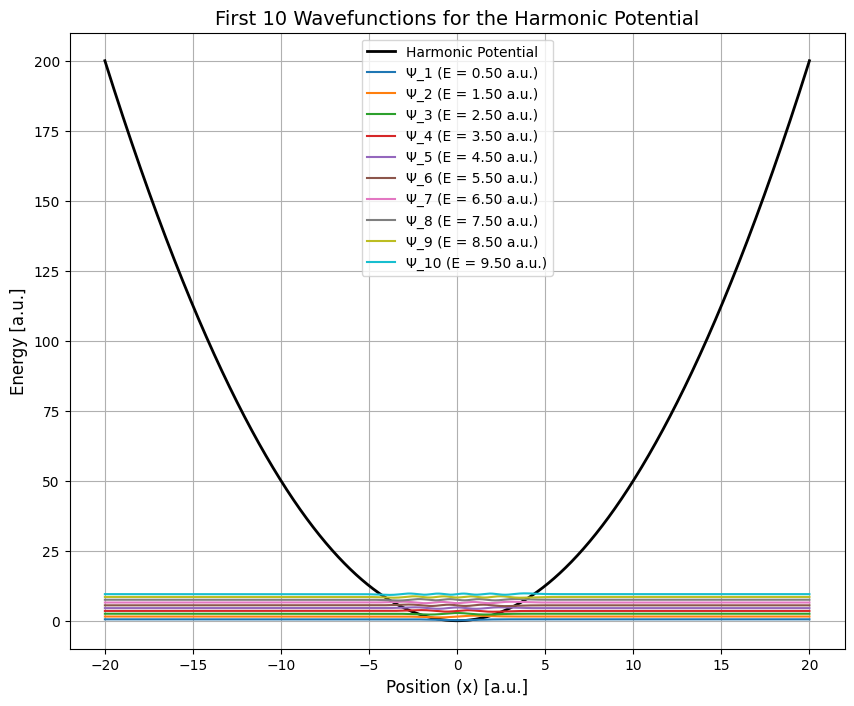

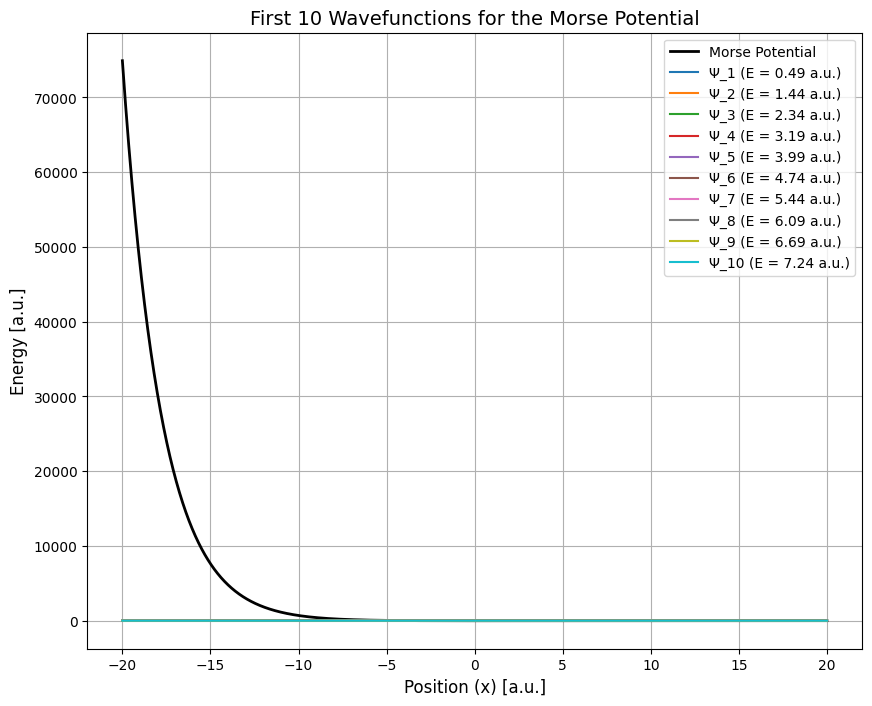

In [17]:
import matplotlib.pyplot as plt

def plot_wavefunctions(x, eigenvalues, eigenfunctions, potential_func, potential_name, num_wavefunctions=10):
    """
    Adjusted plotting function to change the y-axis limits for better clarity.
    
    parameters:
    : x: Grid points (position).
    : eigenvalues: The eigenvalues (energy levels).
    : eigenfunctions: The eigenfunctions (wavefunctions).
    : potential_func: The potential function to overlay on the plot.
    : potential_name: A string to label the plot with the potential's name.
    : num_wavefunctions: Number of wavefunctions to plot (default is 10).
    """
    potential_values = potential_func(x)
    plt.figure(figsize=(10, 8))
    plt.plot(x, potential_values, label=f'{potential_name} Potential', color='black', lw=2)
    for i in range(num_wavefunctions):
        wavefunction = eigenfunctions[:, i] / np.sqrt(np.max(np.abs(eigenfunctions[:, i])))
        plt.plot(x, wavefunction + eigenvalues[i], label=f'Ψ_{i+1} (E = {eigenvalues[i]:.2f} a.u.)')
    plt.title(f'First {num_wavefunctions} Wavefunctions for the {potential_name} Potential', fontsize=14)
    plt.xlabel('Position (x) [a.u.]', fontsize=12)
    plt.ylabel('Energy [a.u.]', fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.show()

# Plot for harmonic potential
plot_wavefunctions(x, first_ten_energies_harmonic, eigenfunctions_harmonic, harmonic_potential, 'Harmonic')

# Plot for Morse potential
plot_wavefunctions(x, first_ten_energies_morse, eigenfunctions_morse, morse_potential, 'Morse')

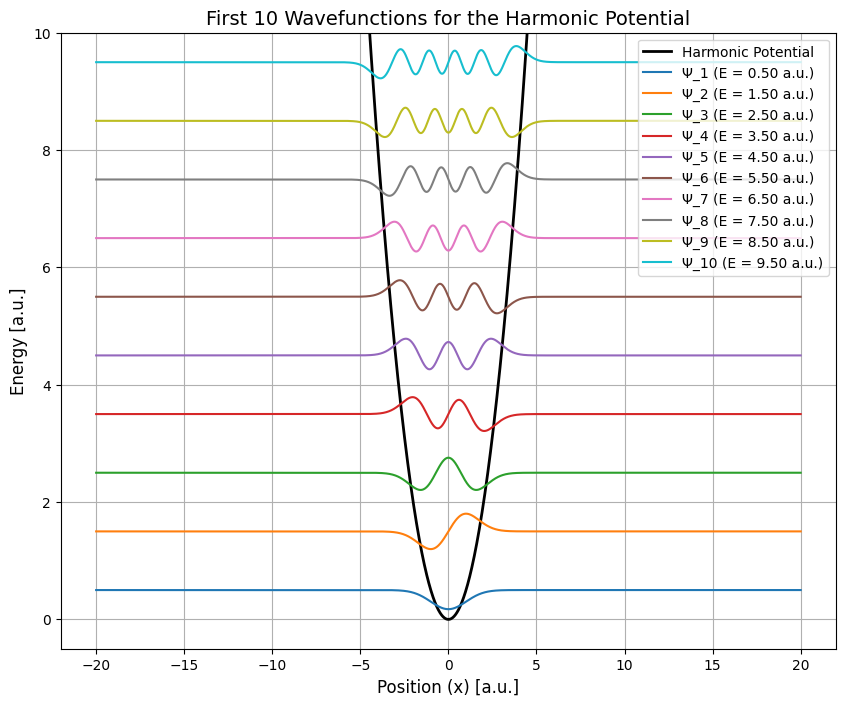

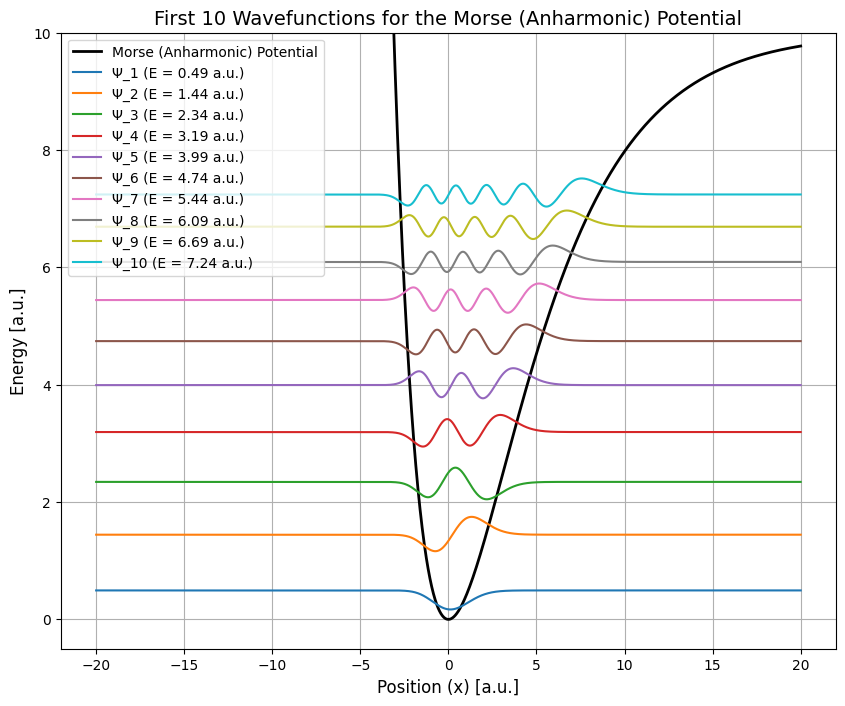

In [18]:
def plot_wavefunctions_adjusted(x, eigenvalues, eigenfunctions, potential_func, potential_name, num_wavefunctions=10, y_limit=None):
    """
    Adjusted plotting function to change the y-axis limits for better clarity.
    
    parameters:
    : x: Grid points (position).
    : eigenvalues: The eigenvalues (energy levels).
    : eigenfunctions: The eigenfunctions (wavefunctions).
    : potential_func: The potential function to overlay on the plot.
    : potential_name: A string to label the plot with the potential's name.
    : num_wavefunctions: Number of wavefunctions to plot (default is 10).
    : y_limit: The y-axis limit to set for the plot (for better clarity).
    """
    # Calculate the potential values at each grid point
    potential_values = potential_func(x)
    
    # Create the plot
    plt.figure(figsize=(10, 8))
    
    # Plot the potential on the same plot
    plt.plot(x, potential_values, label=f'{potential_name} Potential', color='black', lw=2)
    
    # Normalize the wavefunctions and plot the first 10 with their energy levels
    for i in range(num_wavefunctions):
        # Normalize each eigenfunction for plotting
        wavefunction = eigenfunctions[:, i] / np.sqrt(np.max(np.abs(eigenfunctions[:, i])))

        # Shift the wavefunction vertically by the eigenvalue (energy level) for better visualization
        plt.plot(x, wavefunction + eigenvalues[i], label=f'Ψ_{i+1} (E = {eigenvalues[i]:.2f} a.u.)')
    
    # 3-1-5. checkpoint 2) Add titles and labels
    plt.title(f'First {num_wavefunctions} Wavefunctions for the {potential_name} Potential', fontsize=14)
    plt.xlabel('Position (x) [a.u.]', fontsize=12)
    plt.ylabel('Energy [a.u.]', fontsize=12)
    plt.grid(True)
    
    # Set y-axis limit for clarity
    if y_limit:
        plt.ylim(y_limit)
    
    # Add a legend
    plt.legend()
    
    # Show the plot
    plt.show()

# 3-1-5. checkpoint 1) plot for harmonic potential with y-axis scale
y_limit = [-0.5, 10]  # Adjust y-axis scale to focus on the first 10 levels
plot_wavefunctions_adjusted(x, first_ten_energies_harmonic, eigenfunctions_harmonic, harmonic_potential, 'Harmonic', y_limit=y_limit)

# 3-1-5. checkpoint 1) plot for anharmonic potential with y-axis scale
plot_wavefunctions_adjusted(x, first_ten_energies_morse, eigenfunctions_morse, morse_potential, 'Morse (Anharmonic)', y_limit=y_limit)